# Problem Statement

The company has seen a large drop in sales at the end of the year 2017 after succeeding in the previous 3 years due to an increase in customer churn. The company needs to reduce customer churn by understanding the reasons for the loss of shipment orders.
 
We have observed that the majority of orders were delivered late and this might be one of the reasons for an increase in customer churn. so in this project, we are taking the ‘Late_delivery_risk’ column as a target which is a categorical column with 0 and 1 where if the order is delivered late(1) and if the order is delivered on time(0). We would be using the Supervised Learning-Classification to predict late delivery risk. The company can use this information to prioritize the customers with high late delivery risk and make sure that they deliver the products on time to them and decrease customer dissatisfaction due to late delivery which in turn reduces customer churn.

Dataset has information about customers, details of the products which had been shipped, details about the sales, details about the orders, details of shipment and details on the status of the delivery. Below we have mentioned the list of columns with its description provided to us:

1)	Type :  Type of transaction made

2)	Days for shipping (real) :  Actual shipping days of the purchased product

3)	Days for shipment (scheduled) :  Days of scheduled delivery of the purchased product

4)	Benefit per order :  Earnings per order placed

5)	Sales per customer :  Total sales per customer made per customer

6)	Delivery Status :  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time

7)	Late_delivery_risk :  Categorical variable that indicates if sending is late (1), it is not late (0).

8)	Category Id :  Product category code

9)	Category Name :  Description of the product category

10)	Customer City :  City where the customer made the purchase

11)	Customer Country :  Country where the customer made the purchase

12)	Customer Email :  Customer's email

13)	Customer Fname :  Customer name

14)	Customer Id :  Customer ID

15)	Customer Lname :  Customer lastname

16)	Customer Password :  Masked customer key

17)	Customer Segment :  Types of Customers: Consumer , Corporate , Home Office

18)	Customer State :  State to which the store where the purchase is registered belongs

19)	Customer Street :  Street to which the store where the purchase is registered belongs

20)	Customer Zipcode :  Customer Zipcode

21)	Department Id :  Department code of store

22)	Department Name :  Department name of store

23)	Latitude :  Latitude corresponding to location of store

24)	Longitude :  Longitude corresponding to location of store

25)	Market :  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA

26)	Order City :  Destination city of the order

27)	Order Country :  Destination country of the order

28)	Order Customer Id :  Customer order code

29)	order date (DateOrders) :  Date on which the order is made

30)	Order Id :  Order code

31)	Order Item Cardprod Id :  Product code generated through the RFID reader

32)	Order Item Discount :  Order item discount value

33)	Order Item Discount Rate :  Order item discount percentage

34)	Order Item Id :  Order item code

35)	Order Item Product Price :  Price of products without discount

36)	Order Item Profit Ratio :  Order Item Profit Ratio

37)	Order Item Quantity :  Number of products per order

38)	Sales :  Value in sales

39)	Order Item Total :  Total amount per order

40)	Order Profit Per Order :  Order Profit Per Order

41)	Order Region :  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA

42)	Order State :  State of the region where the order is delivered

43)	Order Status :  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW

44)	Order Zipcode : Zipcode of the region where the order is delivered

45)	Product Card Id :  Product code

46)	Product Category Id :  Product category code

47)	Product Description :  Product Description

48)	Product Image :  Link of visit and purchase of the product

49)	Product Name :  Product Name

50)	Product Price :  Product Price

51)	Product Status :  Status of the product stock :If it is 1 not available , 0 the product is available

52)	Shipping date (DateOrders) :  Exact date and time of shipment

53)	Shipping Mode :  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day


# Import Libraries

In [535]:
# Import below Libraries
# Basic Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
# stats Libraries
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import zscore
# Libraries related to preprocessing of data
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# Libraries related to model building
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Understanding

In [536]:
# Import and Read data
data=pd.read_csv("SupplyChainDataset.csv",encoding= 'unicode_escape')
df=data.copy()
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [537]:
# Function to provide basic information about data
def data_info(data):
    rows,cols=data.shape
    print("Data Shape \nRows: {rows} \nColumns: {cols} ".format(rows=rows,cols=cols))
    print("-----------------------------------------------\nData Types")
    print(data.info())
    print("------------------------------------------------\nUnique Number of Values")
    print(data.nunique().sort_values(ascending=False))
    print("-------------------------------------------------\nDuplicated Values Check")
    print(data.duplicated().sum())
    print("--------------------------------------------------\nZero Variance Check")
    print(data.std())
    zv=data.std().to_dict()
    for i,j in zv.items():
        if j==0:
            print("{var} has zero variance ".format(var=i))

data_info(df)

Data Shape 
Rows: 180519 
Columns: 53 
-----------------------------------------------
Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object

Product Description has zero variance, so it has to be dropped.

# Insignificant Variables

In [538]:
df.drop(['Customer Email','Customer Fname','Customer Lname','Customer Password','Latitude','Longitude',
         'Product Card Id','Product Image','Product Price',"Order Customer Id",
         "Benefit per order","Sales per customer","Product Category Id",'Product Status',"Order Item Id",
         'Department Id','Order Item Cardprod Id',"Customer Id"],axis=1,inplace=True)

'Customer Email'
'Customer Password'
'product status'
**zero variance

'Customer Fname'
'Customer Lname'
**insignificant variables

'Department Id'
**similar to department name

"Order Customer Id"
**exactly same as customer id

"Benefit per order"
**exactly similar to Order Profit Per Order.

"Sales per customer"
**exactly similar to Order Item Total.

'Product Image'
'Product Card Id'
'Order Item Cardprod Id'
**redundent of product name

'Product Price'
**redundent column which is similar to Order Item Product Price

"Product Category Id"
**exactly same as category name.

"Order Item Id"
**unique identifiers which are not helpful for analysis.




# Missing Values

In [539]:
# Find missing values 
def missing_values(data):
    data_mv=data.isna().sum().to_dict()
    for i,j in data_mv.items():
        if j!=0:
            print("{var} has: \n{perc} missing values".format(var=i,perc=j))
            print("{perc}% of total missing values".format(var=i,perc=round(j/len(data),4)*100))
            print("Data Type :",data[i].dtype)
            print("---------------------------")

missing_values(df)

Customer Zipcode has: 
3 missing values
0.0% of total missing values
Data Type : float64
---------------------------
Order Zipcode has: 
155679 missing values
86.24000000000001% of total missing values
Data Type : float64
---------------------------
Product Description has: 
180519 missing values
100.0% of total missing values
Data Type : float64
---------------------------


The percentage of missing values exceeds 80% for the two variables, "Product Description" & "Order Zipcode" 
and hence we need to drop them.
Customer Zipcode has less than 10 missing values, so we will drop those records as they cannot be imputed. 

In [540]:
# dropping variables having more than 80% missing values
df.drop(["Order Zipcode","Product Description"],axis=1,inplace=True)

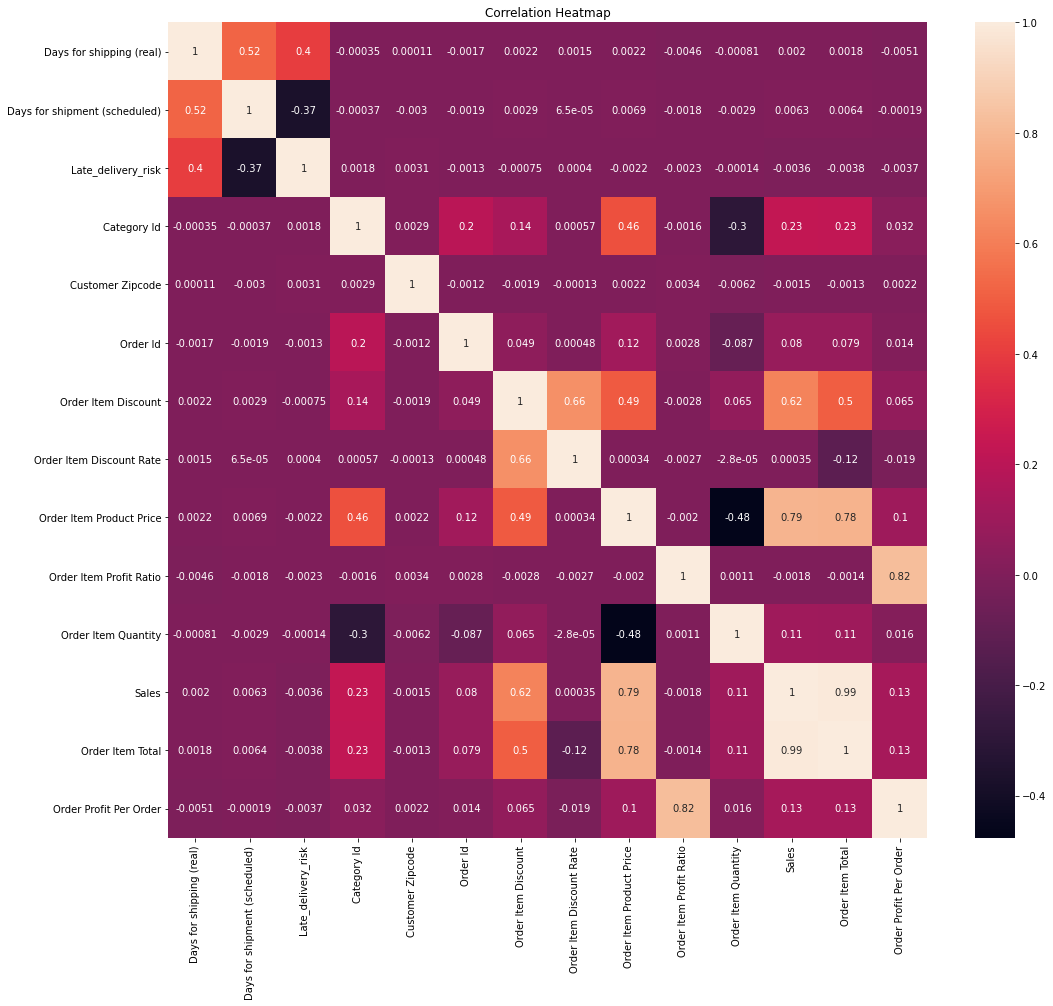

In [541]:
# Multicollinearity check
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [542]:
# dropping variables responsible for multicollinearity
df.drop(["Order Item Product Price","Order Item Total","Order Item Profit Ratio","Order Item Discount Rate"],axis=1,inplace=True)

In [543]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,1,327.75,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,1,327.75,-249.089996,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,1,327.75,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,1,327.75,22.860001,Oceania,Queensland,COMPLETE,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,1,327.75,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,1/15/2018 11:24,Standard Class


In [544]:
df.drop('Type',axis=1,inplace=True)
# not required for our problem statement as it occurs after model prediction stage.

In [545]:
df.drop(["Days for shipping (real)","Days for shipment (scheduled)","Delivery Status"],axis=1,inplace=True)
#Redundent to Late delivery risk

In [546]:
df.shape

(180519, 25)

In [547]:
df.dropna(inplace=True)

# dtype conversion

In [548]:
df.dtypes

Late_delivery_risk              int64
Category Id                     int64
Category Name                  object
Customer City                  object
Customer Country               object
Customer Segment               object
Customer State                 object
Customer Street                object
Customer Zipcode              float64
Department Name                object
Market                         object
Order City                     object
Order Country                  object
order date (DateOrders)        object
Order Id                        int64
Order Item Discount           float64
Order Item Quantity             int64
Sales                         float64
Order Profit Per Order        float64
Order Region                   object
Order State                    object
Order Status                   object
Product Name                   object
shipping date (DateOrders)     object
Shipping Mode                  object
dtype: object

In [549]:
df[["Late_delivery_risk","Category Id","Customer Zipcode","Order Id"]]=df[["Late_delivery_risk",
"Category Id","Customer Zipcode","Order Id"]].astype("object")

# Skewness

In [550]:
# Check the skewness
df.select_dtypes(np.number).skew()

Order Item Discount       3.039940
Order Item Quantity       0.880227
Sales                     2.884304
Order Profit Per Order   -4.741797
dtype: float64

In [551]:
# All the variables are skewed.

# Data Description

In [552]:
df.describe(include="all")

,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
count,180516.0,180516.0,180516,180516,180516,180516,180516,180516,180516.0,180516,180516,180516,180516,180516,180516.0,180516.000000,180516.000000,180516.000000,180516.000000,180516,180516,180516,180516,180516,180516
unique,2.0,51.0,50,562,2,3,44,7456,995.0,11,5,3597,164,65749,65749.0,NaN,NaN,NaN,NaN,23,1089,9,118,63699,4
top,1.0,17.0,Cleats,Caguas,EE. UU.,Consumer,PR,9126 Wishing Expressway,725.0,Fan Shop,LATAM,Santo Domingo,Estados Unidos,06-10-2017 07:41,39433.0,NaN,NaN,NaN,NaN,Central America,Inglaterra,COMPLETE,Perfect Fitness Perfect Rip Deck,3/16/2017 5:00,Standard Class
freq,98976.0,24551.0,24551,66770,111143,93502,69373,122,66770.0,66861,51594,2211,24840,5,5.0,NaN,NaN,NaN,NaN,28341,6721,59489,24515,10,107750
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.664413,2.127656,203.771883,21.974593,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.800633,1.453456,132.273070,104.434300,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,9.990000,-4274.979980,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.400000,1.000000,119.980003,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,1.000000,199.919998,31.520000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.990000,3.000000,299.950012,64.800003,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
* Majority of the orders have come under the cleats category and most of the customers are from Caguas city.

* Most  of the orders have been placed to Santo Domingo city.

* Minimum profit per order is -4274 dollars(negative sign indicates loss) which might be an anomaly or an outlier.

* The average order quantity is 2 products and the average sale is around 200 dollars.

* the mean discount for an order is around 20 dollars.

In [553]:
df_cl=df.copy()

# Exploratory Data Analysis

In [554]:
df=data.copy()

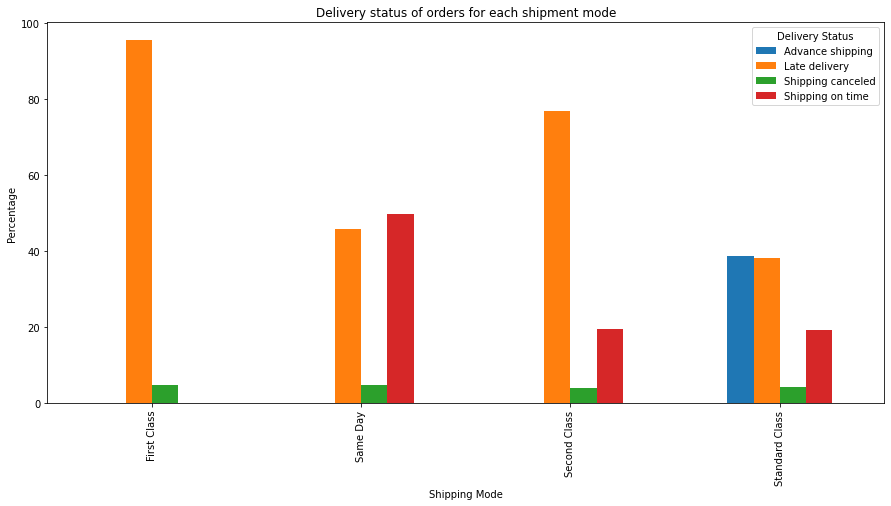

In [555]:
pd.crosstab(df["Shipping Mode"],df["Delivery Status"]).apply(lambda r:r/r.sum()*100,axis=1).plot(kind="bar",figsize=(15,7))
plt.ylabel("Percentage")
plt.title("Delivery status of orders for each shipment mode")
plt.show()

The percentage of late deliveries is high in first class and second class comparatively. one can observe that most of orders have been delivered late. 

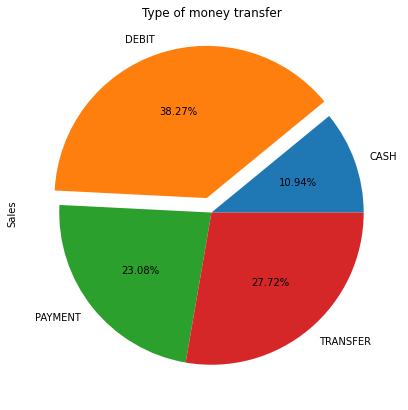

In [556]:
plt.figure(figsize=(15,7))
df.groupby("Type")["Sales"].sum().plot(kind="pie",autopct='%1.2f%%',explode=[0,0.1,0,0])
plt.title("Type of money transfer")
plt.show()

Majority of the money transfer is by debit which means company has lot of loyal customers who purchase products regularly and the money gets debited automatically from their accounts.

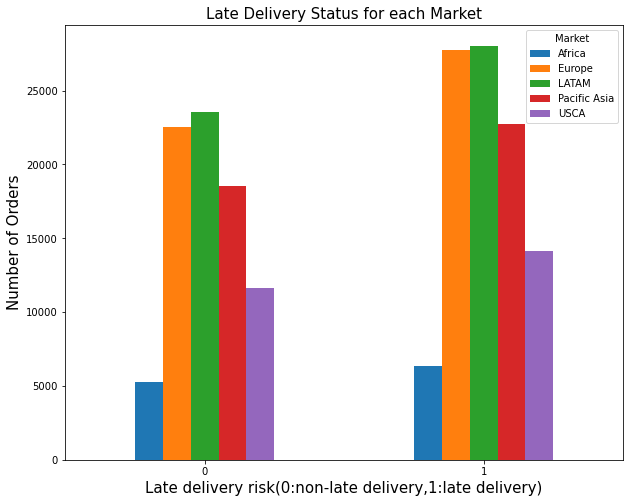

In [557]:
market_deliv = pd.crosstab(df["Late_delivery_risk"],df["Market"])
market_deliv.plot(kind='bar',figsize=(10,8),rot=0)
plt.ylabel("Number of Orders",fontsize=15)
plt.xlabel("Late delivery risk(0:non-late delivery,1:late delivery)",fontsize=15)
plt.title("Late Delivery Status for each Market",fontsize=15)
plt.show()

one can observe that the market has no impact on late deliveries

In [558]:
pd.crosstab(df["Delivery Status"],df["Order Item Quantity"]).apply(lambda r:r/r.sum(),axis=0)*100

Order Item Quantity,1,2,3,4,5
Delivery Status,,,,,
Advance shipping,22.961850,23.125769,23.066339,23.058766,23.291636
Late delivery,54.880263,54.339158,55.115479,54.816818,54.795193
Shipping canceled,4.266952,4.518828,4.309582,4.199656,4.292372
Shipping on time,17.890936,18.016244,17.508600,17.924760,17.620800


In [559]:
pd.crosstab(df["Delivery Status"],df["Market"]).apply(lambda r:r/r.sum(),axis=0)*100

Market,Africa,Europe,LATAM,Pacific Asia,USCA
Delivery Status,,,,,
Advance shipping,22.774238,23.091618,23.334109,22.959283,22.601651
Late delivery,54.589289,55.207753,54.355158,55.046049,54.800574
Shipping canceled,3.960737,4.302316,4.428810,4.059622,4.542812
Shipping on time,18.675736,17.398313,17.881924,17.935046,18.054963


In [560]:
pd.crosstab(df["Delivery Status"],df["Customer Country"]).apply(lambda r:r/r.sum(),axis=0)*100

Customer Country,EE. UU.,Puerto Rico
Delivery Status,,
Advance shipping,22.944595,23.193461
Late delivery,54.870171,54.763381
Shipping canceled,4.247566,4.372018
Shipping on time,17.937668,17.671140


The above tables show that the variables order item quantity and customer country have no relationship with the late delivery.

In [561]:
pd.crosstab(df["Delivery Status"],df["Order City"]).apply(lambda r:r/r.sum(),axis=0)*100

Order City            Aachen  Aalen      Aalst        Aba     Abadan  \
Delivery Status                                                        
Advance shipping   15.873016    0.0   0.000000  33.333333  24.242424   
Late delivery      44.444444  100.0  69.565217  50.000000  45.454545   
Shipping canceled   4.761905    0.0   0.000000   0.000000   0.000000   
Shipping on time   34.920635    0.0  30.434783  16.666667  30.303030   

Order City         Abakaliki  Abbeville  Abbotsford   Abeokuta   Aberdeen  \
Delivery Status                                                             
Advance shipping        50.0  58.333333    0.000000  13.333333   9.523810   
Late delivery            0.0  41.666667   55.555556  46.666667  61.904762   
Shipping canceled        0.0   0.000000    0.000000  13.333333  23.809524   
Shipping on time        50.0   0.000000   44.444444  26.666667   4.761905   

Order City              Abha    Abidjan  Abilene  Abreu e Lima  Abu Kabir  \
Delivery Status                                                             
Advance shipping   45.454545  12.765957      0.0         100.0       12.5   
Late delivery      36.363636  70.212766      0.0           0.0       87.5   
Shipping canceled   0.000000   1.595745      0.0           0.0        0.0   
Shipping on time   18.181818  15.425532    100.0           0.0        0.0   

Order City          Acarigua   Acayucan      Accra  Acerra   Acireale  \
Delivery Status                                                         
Advance shipping   23.076923  58.620690  11.834320     0.0  28.333333   
Late delivery      50.000000  27.586207  64.497041    75.0  48.333333   
Shipping canceled   0.000000  13.793103   4.142012    25.0   0.000000   
Shipping on time   26.923077   0.000000  19.526627     0.0  23.333333   

Order City             Acuña  Acámbaro  Ad Diwaniyah  Ad Diwem      Adana  \
Delivery Status                                                             
Advance shipping   23.333333      25.0     30.555556      25.0  15.748031   
Late delivery      46.666667      75.0     38.888889      35.0  61.417323   
Shipping canceled   0.000000       0.0      0.000000      15.0   4.724409   
Shipping on time   30.000000       0.0     30.555556      25.0  18.110236   

Order City          Adelaide   Adiyaman   Aew?l-li  Afragola  Afyon  \
Delivery Status                                                       
Advance shipping   26.470588   0.000000  33.333333       0.0    0.0   
Late delivery      51.680672  84.615385  66.666667      50.0  100.0   
Shipping canceled   3.781513   0.000000   0.000000       0.0    0.0   
Shipping on time   18.067227  15.384615   0.000000      50.0    0.0   

Order City            Agadir       Agde  Agen   Agra  Agrigento      Ahvaz  \
Delivery Status                                                              
Advance shipping   46.341463  44.444444  50.0  18.75       12.5  49.090909   
Late delivery      34.146341  55.555556  50.0  52.50       75.0  25.454545   
Shipping canceled   7.317073   0.000000   0.0  16.25        0.0   0.000000   
Shipping on time   12.195122   0.000000   0.0  12.50       12.5  25.454545   

Order City         Ain Oussera  Aix-en-Provence  Aix-les-Bains    Ajaccio  \
Delivery Status                                                             
Advance shipping           0.0        25.581395            0.0  42.857143   
Late delivery             75.0        60.465116          100.0  57.142857   
Shipping canceled          0.0         1.162791            0.0   0.000000   
Shipping on time          25.0        12.790698            0.0   0.000000   

Order City             Ajman      Ajmer  Akhisar      Akola      Akron  \
Delivery Status                                                          
Advance shipping   57.142857  30.666667    100.0  38.461538  19.298246   
Late delivery      42.857143  58.666667      0.0  50.000000  66.666667   
Shipping canceled   0.000000   0.000000      0.0   0.000000   0.000000   
Shipping o

In [562]:
pd.crosstab(df["Delivery Status"],df["Days for shipment (scheduled)"]).apply(lambda r:r/r.sum()*100,axis=1)

Days for shipment (scheduled),0,1,2,4
Delivery Status,,,,
Advance shipping,0.000000,0.000000,0.000000,100.000000
Late delivery,4.500035,26.787031,27.265930,41.447003
Shipping canceled,5.726077,16.778437,18.184163,59.311323
Shipping on time,15.029817,0.000000,21.179650,63.790533


In [563]:
pd.crosstab(df["Delivery Status"],df["Order State"]).apply(lambda r:r/r.sum(),axis=0)*100

Order State,Abia,Abruzos,Aceh,Acre,Adamaoua,Adamawa,Adana,Adiyaman,Afyonkarahisar,Aichi,Ajmán,Akmola,Aksaray,Akwa Ibom,Al Asimah,Al Bahr al Ahmar,Al Buhayrah,Al Hudayda,Al Jawf,Al Marqab,Alabama,Alagoas,Alberta,Alejandría,Alger,Alibori,Almaty,Alsacia-Champaña-Ardenas-Lorena,Alta Austria,Amapá,Amasya,Amazonas,Amberes,Amur,Amán,Analamanga,Anambra,Ancash,Andalucía,Andhra Pradesh,Andiján,Anhui,Ankara,Annaba,Anseba,Antalya,Antioquía,Antofagasta,Anzoátegui,Aomori,Apulia,Aquitania-Lemosín-Poitou-Charentes,Ar Raqa,Arad,Aragua,Arauca,Arbil,Ardahan,Ardebil,Arequipa,Arges,Arica y Parinacota,Arizona,Arjánguelsk,Arkansas,Artemisa,Artibonito,Arusha,Ash Sharqiyah,Ashanti,Asir,Asiut,Asjabad,Assam,Astaná,Astracán,Asturias,Asunción,Aswan,Atacama,Atakora,Atlántico,Atlántida,Atsimo-Andrefana,Atsinanana,Attica,Auckland,Australia Occidental,Australia del Sur,Auvernia,Auvernia-Ródano-Alpes,Aveiro,Ayacucho,Aydin,Azuay,Babilonia,Bacau,Baden-Wurtemberg,Bagdad,Bahía,Baja California,Baja California Sur,Baja Sajonia,Bajo Congo,Baki,Bali,Balikesir,Balti,Baluchistán,Bamako,Bandundu,Bangkok,Bangui,Bani Suwayf,Banská Bystrica,Barahona,Bashkortostán,Basilea-Ciudad,Basilicata,Basora,Batman,Batna,Bauchi,Bavaria,Bay of Plenty,Beirut,Benadir,Bengala Occidental,Bengasi,Bengkulu,Benguela,Benue,Berlín,Berna,Bihar,Bihor,Bingöl,Bishkek,Bistrita-Nasaud,Bisáu,Bitola,Bié,Boeny,Bogotá,Bolu,Bolívar,Borgou,Borgoña-Franco Condado,Borneo Meridional,Borneo Occidental,Borno,Botosani,Boyacá,Bra?ov,Brabante Flamenco,Brabante Septentrional,Braga,Braila,Brandenburgo,Bremen,Brest,Bretaña,Briansk,Bruselas,Budapest,Buenos Aires,Buenos Aires (provincia),Bugía,Bulawayo,Burgas,Bursa,Busan,Bushehr,Buskerud,Buyumbura Mairie,Buzau,Béchar,Békés,Bélgorod,Bío-Bío,Cabo Delgado,Cabo Occidental,Cabo Oriental,Cadisia,Cajamarca,Calabarzón,Calabria,Caldas,California,Callao,Camagüey,Campania,Campeche,Canelones,Cantabria,Canterbury,Capital Nacional,Caquetá,Carabobo,Caras-Severin,Carintia,Carolina del Norte,Carolina del Sur,Casanare,Castilla y León,Castilla-La Mancha,Cataluña,Catamarca,Ceará,Central,Centro,Centro-Valle de Loira,Cerdeña,Cesar,Ceuta,Chaco,Chaguanas,Chandigarh,Chauía-Uardiga,Cheliábinsk,Cherkasy,Chernihiv,Chhattisgarh,Chiapas,Chiba,Chihuahua,Chimaltenango,Chinandega,Chiriquí,Chisináu,Chittagong,Chocó,Choluteca,Chongqing,Chubut,Chukha,Chungcheong del Sur,Chuquisaca,Cidade De Maputo,Ciego de Ávila,Cienfuegos,Ciudad Ho Chi Minh,Ciudad de Almatý,Cluj,Coahuila,Cochabamba,Coimbra,Cojedes,Colima,Colorado,Columbia británica,Colón,Connecticut,Constantina,Constanza,Copperbelt,Cordillera,Cork,Corrientes,Corse,Cortés,Corum,Costa,Cross River,Cundinamarca,Cuscatlán,Célebes Central,Célebes Septentrional,Célebes Suroriental,Córdoba,Daca,Daegu,Daejeon,Daguestán,Dakar,Dakota del Norte,Dakota del Sur,Dar es Salaam,Dayr az Zawr,Delaware,Delhi,Delta,Demerara-Berbice Superior,Denizli,Departamento Atlántico,Di Car,Diala,Diana,Diffa,Dinamarca Meridional,Dire Dawa,Distrito Capital,Distrito Federal,Distrito de Cayo,Distrito de Columbia,Dix-Huit Montagnes,Diyarbakir,Djelfa,Dnipropetrovsk,Doha,Dolj,Donetsk,Donga,Drenthe,Duarte,Dublín,Dublín del Sur,Dukala-Abda,Durango,Durrës,Dà Nang,Düzce,Ebonyi,Ecuatoria Central,Edo,El Aaiún,El Beni,El Cairo,Elazig,Elbasan,Emilia-Romaña,Entre Ríos,Enugu,Erzurum,Escania,Escocia,Escuintla,Eskisehir,Espaillat,Espíritu Santo,Est,Estado Libre,Estambul,Estelí,Estocolmo,Estuaire,Extremadura,Extreme-Nord,Fars,Fayún,Federación de Bosnia y Herzegovina,Fez-Bulmán,Finlandia del Sudoeste,Flanders Occidental,Flanders Oriental,Florida,Francisco Morazán,Französisch-Guayana,Frisia,Friuli-Venecia Julia,Fromager,Fujian,Fukui,Fukuoka,Galati,Gales,Galicia,Galway,Gansu,Garb-Chrarda-Beni Hsen,Gauteng,Gaziantep,Georgia,Gezira,Gharbia,Ginebra,Gisborne,Giurgiu,Gobolka Woqooyi Galbeed,Goiás,Golestán,Gombe,Gorj,Grad Zagreb,Gran Accra,Gran Casablanca,Gran Polonia,Gran Valle del Rift,Granada,Grand Gedeh,Granma,Grodno,Groningen,Guadalupe,Guanacaste,Guanajuato,Guangdong,Guangxi,Guantánamo,Guatemala,Guayas,Guelma,G

In [564]:
pd.crosstab(df["Delivery Status"],df["Customer City"]).apply(lambda r:r/r.sum(),axis=0)*100

Customer City,Aguadilla,Alameda,Albany,Albuquerque,Algonquin,Alhambra,Allentown,Alpharetta,Amarillo,Anaheim,Ann Arbor,Annandale,Annapolis,Antioch,Apex,Apopka,Arecibo,Arlington,Arlington Heights,Asheboro,Astoria,Atlanta,Augusta,Aurora,Austin,Azusa,Bakersfield,Baldwin Park,Ballwin,Baltimore,Bartlett,Bay Shore,Bayamon,Bayonne,Baytown,Beaverton,Bell Gardens,Bellflower,Bellingham,Beloit,Bend,Bensalem,Berwyn,Billings,Birmingham,Bismarck,Blacksburg,Bloomfield,Bolingbrook,Bountiful,Bowling Green,Brandon,Brentwood,Bridgeton,Brighton,Bristol,Brockton,Broken Arrow,Bronx,Brooklyn,Broomfield,Brownsville,Buena Park,Buffalo,Burnsville,CA,Caguas,Campbell,Canoga Park,Canovanas,Canton,Canyon Country,Carlisle,Carlsbad,Carmichael,Carol Stream,Carolina,Carrollton,Carson,Cary,Catonsville,Cayey,Cerritos,Chambersburg,Chandler,Chapel Hill,Charlotte,Chesapeake,Chicago,Chicago Heights,Chillicothe,Chino,Chino Hills,Chula Vista,Cicero,Cincinnati,Citrus Heights,Clarksville,Clearfield,Clementon,Cleveland,Clovis,College Station,Colorado Springs,Colton,Columbia,Columbus,Compton,Conway,Cordova,Corona,Costa Mesa,Crown Point,Crystal Lake,Cumberland,Cupertino,Cypress,Dallas,Daly City,Danbury,Davis,Dayton,Dearborn,Decatur,Del Rio,Denton,Denver,Des Plaines,Detroit,Diamond Bar,Dorchester Center,Douglasville,Doylestown,Dubuque,Duluth,Dundalk,Eagle Pass,East Brunswick,East Lansing,Edinburg,Edison,El Cajon,El Centro,El Monte,El Paso,Elgin,Elk Grove,Elmhurst,Elyria,Encinitas,Endicott,Enfield,Englewood,Escondido,Eugene,Everett,Ewa Beach,Fairfield,Far Rockaway,Fargo,Fayetteville,Federal Way,Findlay,Florissant,Flushing,Folsom,Fond Du Lac,Fontana,Forest Hills,Fort Lauderdale,Fort Washington,Fort Worth,Fountain Valley,Frankfort,Freehold,Freeport,Fremont,Fresno,Fullerton,Gaithersburg,Garden Grove,Gardena,Garland,Germantown,Gilroy,Glen Burnie,Glendale,Glenview,Goleta,Goose Creek,Granada Hills,Grand Prairie,Granite City,Greeley,Greensboro,Greensburg,Greenville,Grove City,Guayama,Guaynabo,Gwynn Oak,Hacienda Heights,Hagerstown,Hamilton,Hampton,Hamtramck,Hanford,Hanover,Harlingen,Harvey,Hawthorne,Hayward,Hempstead,Henderson,Hendersonville,Henrico,Hesperia,Hialeah,Hickory,Highland,Highland Park,Hilliard,Holland,Hollister,Hollywood,Honolulu,Houston,Howell,Humacao,Huntington Beach,Huntington Park,Huntington Station,Hyattsville,Indianapolis,Indio,Irving,Irvington,Irwin,Ithaca,Jackson,Jackson Heights,Jacksonville,Jamaica,Jersey City,Joliet,Jonesboro,Juana Diaz,Kailua,Kaneohe,Katy,Kenner,Kent,Knoxville,La Crosse,La Habra,La Mesa,La Mirada,La Puente,Laguna Hills,Laguna Niguel,Lake Forest,Lakewood,Lancaster,Lansdale,Laredo,Las Cruces,Las Vegas,Lawrence,Lawrenceville,Lawton,Lenoir,Levittown,Lewisville,Lilburn,Lindenhurst,Lithonia,Littleton,Livermore,Lockport,Lodi,Lombard,Lompoc,Long Beach,Longmont,Longview,Los Angeles,Louisville,Loveland,Lutz,Lynn,Lynnwood,Lynwood,Madera,Madison,Malden,Manati,Manchester,Marietta,Marion,Marrero,Martinez,Martinsburg,Massapequa,Massillon,Mayaguez,Mcallen,Mchenry,Mechanicsburg,Medford,Medina,Memphis,Mentor,Merced,Meridian,Mesa,Mesquite,Metairie,Methuen,Miami,Michigan City,Middletown,Milford,Mililani,Milpitas,Milwaukee,Mission,Mission Viejo,Modesto,Moline,Montebello,Moreno Valley,Morganton,Morristown,Morrisville,Mount Pleasant,Mount Prospect,Murfreesboro,Muskegon,Napa,Nashville,National City,New Albany,New Bedford,New Braunfels,New Brunswick,New Castle,New Haven,New Orleans,New York,Newark,Newburgh,Norcross,Norfolk,Normal,North Bergen,North Hills,North Hollywood,North Las Vegas,North Richland Hills,North Tonawanda,Norwalk,O Fallon,Oak Lawn,Oakland,Oceanside,Ogden,Olathe,Ontario,Opa Locka,Opelousas,Orange Park,Oregon City,Orlando,Oviedo,Oxnard,Pacoima,Painesville,Palatine,Palmdale,Palo Alto,Panorama City,Paramount,Parkville,Pasadena,Passaic,Pawtucket,Peabody,Pekin,Peoria,Perth Amboy,Pharr,Philadelphia,Phoenix,Pico Rivera,Piscataway,Pittsburg,Pittsfield,Placentia,Plainfield,Plano,Plymouth,Pomona,Pompano Beach,Ponce,Porterville,Portland,Potomac,Poway,Powder Spring

The above four cross tables show that the variables orderstate, ordercity, customercity and scheduled number of days have great impact on late delivery. these relationships will be checked by performing chi2 tests on them.

# Scaling

In [565]:
df=df_cl.copy()

In [566]:
# Scale the numerical variables.
df_cont = df.select_dtypes(np.number)
df_cont.head()

,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order
0,13.110000,1,327.75,91.250000
1,16.389999,1,327.75,-249.089996
2,18.030001,1,327.75,-247.779999
3,22.940001,1,327.75,22.860001
4,29.500000,1,327.75,134.210007


In [567]:
df_cat=df.select_dtypes("object")
df_cat.head()

,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,Southeast Asia,Java Occidental,COMPLETE,Smart watch,02-03-2018 22:56,Standard Class
1,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class
2,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,South Asia,Rajastán,CLOSED,Smart watch,1/17/2018 12:06,Standard Class
3,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,Oceania,Queensland,COMPLETE,Smart watch,1/16/2018 11:45,Standard Class
4,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,Oceania,Queensland,PENDING_PAYMENT,Smart watch,1/15/2018 11:24,Standard Class


In [568]:
df_cat.shape

(180516, 21)

In [569]:
ss = StandardScaler()

In [570]:
df_cont_scaled = pd.DataFrame(data=ss.fit_transform(df_cont),columns=df_cont.columns)
df_cont_scaled.head()

,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order
0,-0.346524,-0.775847,0.937292,0.663341
1,-0.196069,-0.775847,0.937292,-2.595559
2,-0.120841,-0.775847,0.937292,-2.583015
3,0.104382,-0.775847,0.937292,0.008478
4,0.405291,-0.775847,0.937292,1.074702


In [571]:
df_fin=pd.concat([df_cont_scaled,df_cat],axis=1)
df_fin.head()

,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
0,-0.346524,-0.775847,0.937292,0.663341,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,Southeast Asia,Java Occidental,COMPLETE,Smart watch,02-03-2018 22:56,Standard Class
1,-0.196069,-0.775847,0.937292,-2.595559,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class
2,-0.120841,-0.775847,0.937292,-2.583015,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,South Asia,Rajastán,CLOSED,Smart watch,1/17/2018 12:06,Standard Class
3,0.104382,-0.775847,0.937292,0.008478,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,Oceania,Queensland,COMPLETE,Smart watch,1/16/2018 11:45,Standard Class
4,0.405291,-0.775847,0.937292,1.074702,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,Oceania,Queensland,PENDING_PAYMENT,Smart watch,1/15/2018 11:24,Standard Class


In [572]:
df_fin.shape

(180519, 25)

# Feature Engineering

In [573]:
# convert the date related variables to datetime dtype. 
df_fin["order date (DateOrders)"]=pd.to_datetime(df_fin["order date (DateOrders)"])
df_fin["shipping date (DateOrders)"]=pd.to_datetime(df_fin["shipping date (DateOrders)"])

In [574]:
# extract month out of order date.
df_fin["Month"]=df_fin["order date (DateOrders)"].dt.month

In [575]:
# extract year out of order date.
df_fin["Year"]=df_fin["order date (DateOrders)"].dt.year

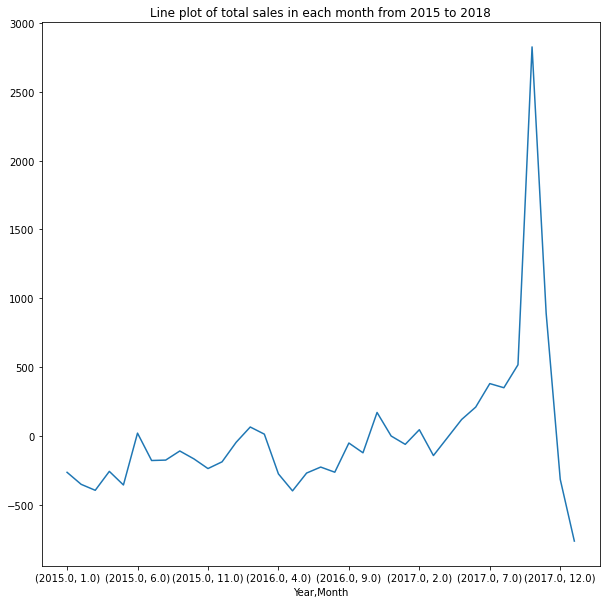

In [576]:
df_fin.groupby(["Year","Month"])["Sales"].sum().plot(kind="line",figsize=(10,10))
plt.title("Line plot of total sales in each month from 2015 to 2018")
plt.show()

One can observe that the plot describes a large drop in total sales at the end of 2017.

In [577]:
df_fin.head()

,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,Month,Year
0,-0.346524,-0.775847,0.937292,0.663341,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725,Fitness,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,Southeast Asia,Java Occidental,COMPLETE,Smart watch,2018-02-03 22:56:00,Standard Class,1.0,2018.0
1,-0.196069,-0.775847,0.937292,-2.595559,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725,Fitness,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,South Asia,Rajastán,PENDING,Smart watch,2018-01-18 12:27:00,Standard Class,1.0,2018.0
2,-0.120841,-0.775847,0.937292,-2.583015,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125,Fitness,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,South Asia,Rajastán,CLOSED,Smart watch,2018-01-17 12:06:00,Standard Class,1.0,2018.0
3,0.104382,-0.775847,0.937292,0.008478,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027,Fitness,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,Oceania,Queensland,COMPLETE,Smart watch,2018-01-16 11:45:00,Standard Class,1.0,2018.0
4,0.405291,-0.775847,0.937292,1.074702,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,Oceania,Queensland,PENDING_PAYMENT,Smart watch,2018-01-15 11:24:00,Standard Class,1.0,2018.0


# Outlier Analysis

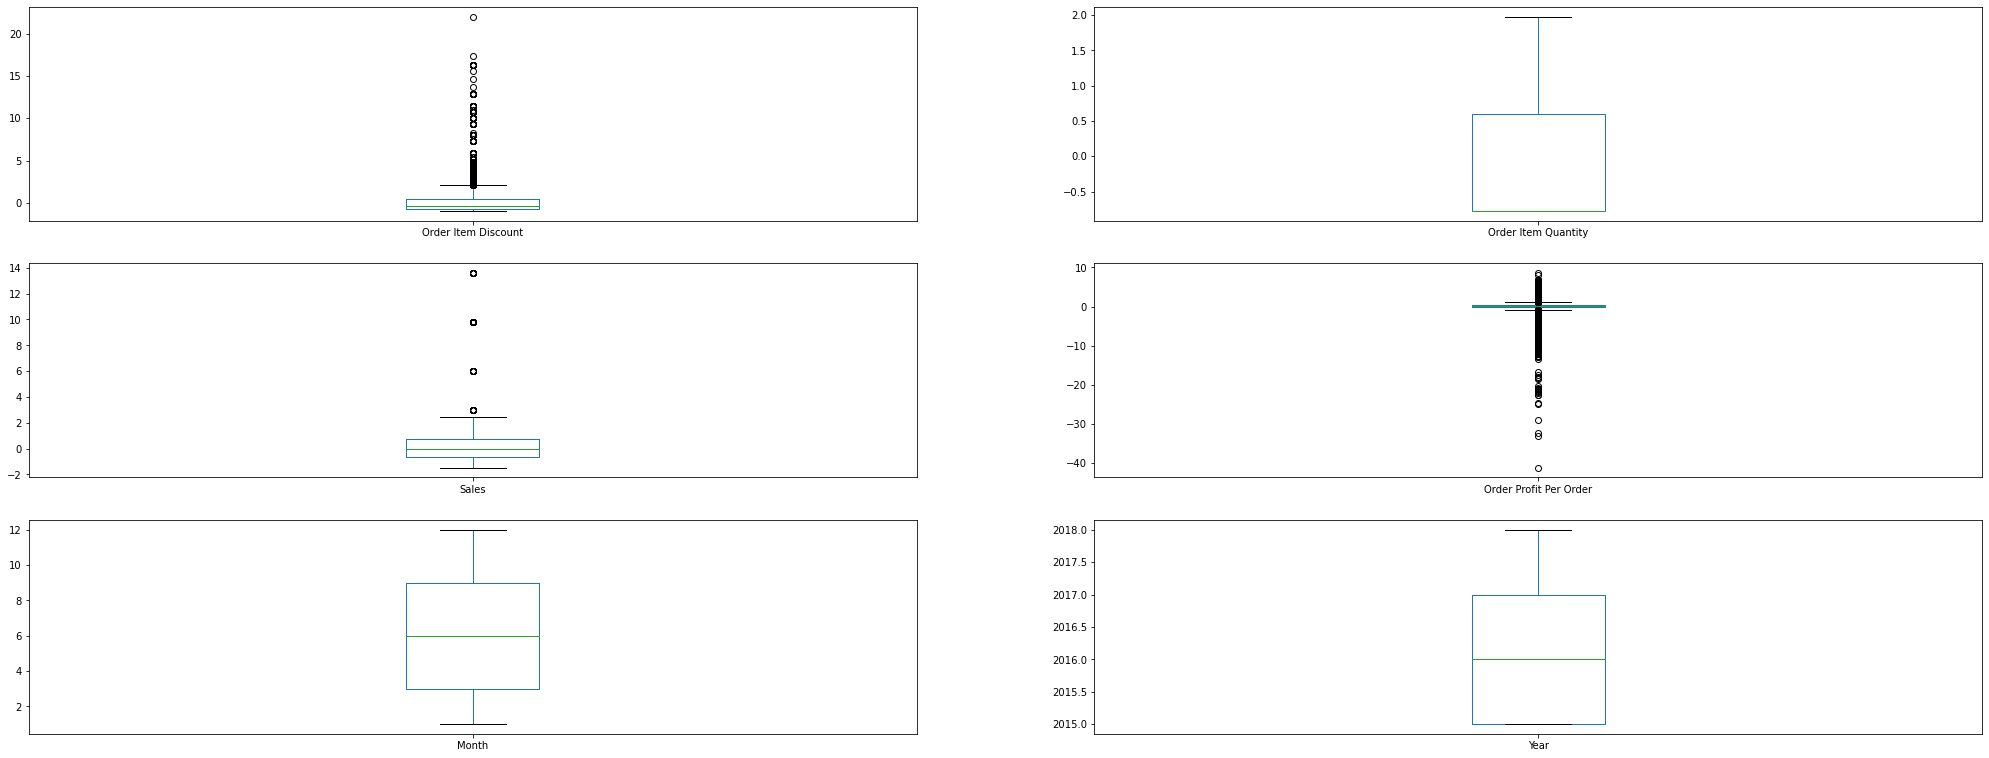

In [578]:
df_fin.select_dtypes(np.number).plot(kind="box",subplots=True,layout=(15,2),figsize=(35,70))
plt.show()

# Outlier Treatment

In [579]:
dfm=df_fin

In [580]:
# apply IQR method to remove outliers
Q1= dfm["Sales"].quantile(.25)
Q3= dfm["Sales"].quantile(.75)
IQR= Q3-Q1
dfm= dfm[((dfm["Sales"]>(Q1-1.5*IQR)) & (dfm["Sales"]<(Q3+1.5*IQR)))]
dfm.shape

(180028, 27)

In [581]:
# apply IQR method to remove outliers
Q1= dfm["Order Profit Per Order"].quantile(.25)
Q3= dfm["Order Profit Per Order"].quantile(.75)
IQR= Q3-Q1
dfm= dfm[((dfm["Order Profit Per Order"]>(Q1-1.5*IQR)) & (dfm["Order Profit Per Order"]<(Q3+1.5*IQR)))]
dfm.shape

(161420, 27)

In [582]:
# apply IQR method to remove outliers
Q1= dfm["Order Item Discount"].quantile(.25)
Q3= dfm["Order Item Discount"].quantile(.75)
IQR= Q3-Q1
dfm= dfm[((dfm["Order Item Discount"]>(Q1-1.5*IQR)) & (dfm["Order Item Discount"]<(Q3+1.5*IQR)))]
dfm.shape

(154329, 27)

# Encoding 

In [583]:
dfm["Year"]=dfm["Year"].astype("object")
dfm["Month"]=dfm["Month"].astype("object")

In [584]:
# Dropping varibles which would be observed after model prediction and unique identifiers.
dfm.drop(["shipping date (DateOrders)","order date (DateOrders)","Order Id"],axis=1,inplace=True)

In [585]:
dfm.dropna(inplace=True)

Here the objective is to produce a final model of high accuracy, so we will consider Ensemble models. Label encoding the categorical variables would work properly for ensemble models and also for decision tree which can be can be considered as a final model if speed of the computation is a constraint. Even though our label encoding approach is to fit the data to decision tree based models, we will also be fitting the data to distance based models to see their performance. 

In [586]:
df_le=dfm.copy()
df_le.head()

,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Month,Year
0,-0.346524,-0.775847,0.937292,0.663341,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class,1,2018
3,0.104382,-0.775847,0.937292,0.008478,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,Smart watch,Standard Class,1,2018
4,0.405291,-0.775847,0.937292,1.074702,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,Smart watch,Standard Class,1,2018
5,0.555746,-0.775847,0.937292,-0.032505,0,73,Sporting Goods,Tonawanda,EE. UU.,Consumer,NY,2122 Hazy Corner,14150,Fitness,Pacific Asia,Toowoomba,Australia,Oceania,Queensland,CANCELED,Smart watch,Standard Class,1,2018
6,0.856197,-0.775847,0.937292,0.700973,1,73,Sporting Goods,Caguas,Puerto Rico,Home Office,PR,1879 Green Pine Bank,725,Fitness,Pacific Asia,Guangzhou,China,Eastern Asia,Guangdong,COMPLETE,Smart watch,First Class,1,2018


In [587]:
# Label encode the categorical variables.
from sklearn.preprocessing import LabelEncoder
df_le_cat=df_le.iloc[:,5:]
for i in df_le_cat.columns:
    le=LabelEncoder()
    df_le[i]=le.fit_transform(df_le[[i]])

In [588]:
df_le.head()

,Order Item Discount,Order Item Quantity,Sales,Order Profit Per Order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Month,Year
0,-0.346524,-0.775847,0.937292,0.663341,0,47,40,65,1,0,34,3617,7,4,3,330,70,15,472,2,78,3,0,3
3,0.104382,-0.775847,0.937292,0.008478,0,47,40,284,0,2,3,1775,720,4,3,3212,8,11,832,2,78,3,0,3
4,0.405291,-0.775847,0.937292,1.074702,0,47,40,65,1,1,34,6237,7,4,3,3212,8,11,832,6,78,3,0,3
5,0.555746,-0.775847,0.937292,-0.032505,0,47,40,504,0,0,29,953,173,4,3,3193,8,11,832,0,78,3,0,3
6,0.856197,-0.775847,0.937292,0.700973,1,47,40,65,1,2,34,755,7,4,3,1231,31,7,384,2,78,0,0,3


In [589]:
# train test split the data.
x=df_le.drop("Late_delivery_risk",axis=1)
y=df_le["Late_delivery_risk"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

## Feature selection : Statistical_tests

chi2 test will be performed to select the significant categorical features.

H0 : variables are independent
H1 : variables are dependent

In [590]:
x_cat=x.iloc[:,4:]

In [591]:
# perform chi2 test on categorical variables with the target categorical variable.
from sklearn.feature_selection import chi2
f_stat,f_pval=chi2(x_cat,y.astype("int"))

In [592]:
df_fpval=pd.DataFrame(data=f_pval,index=x_cat.columns,columns=["f_pval"])
df_fpval.sort_values(by="f_pval",ascending=True)

,f_pval
Shipping Mode,0.000000e+00
Order City,1.657120e-261
Customer City,4.236593e-143
Customer Zipcode,6.599817e-116
Customer Street,1.282717e-24
Product Name,1.035290e-05
Order Region,3.701377e-05
Order Country,2.124435e-04
Order State,9.781280e-04
Customer State,2.611778e-03


we can see that the p_values of significant features are below 0.05(assuming that the significance value is 5% ) which means target variable is dependent on these significant features.

In [593]:
#Dropping insignificant features
df_le.drop(["Order Status","Department Name","Month","Customer Segment","Category Id","Year","Customer Country","Market"],axis=1,inplace=True)

In [594]:
# mannwhitneyu test(non-parametric test) can be performed if the numerical variable is not normal and if the categorical variable has 2 subclasses.

In [595]:
df_yes=df_le[df_le["Late_delivery_risk"]==1]
df_no=df_le[df_le["Late_delivery_risk"]==0]

In [596]:
stats.shapiro(df_le["Order Item Discount"])

ShapiroResult(statistic=0.8946532011032104, pvalue=0.0)

In [597]:
#order item discount is not normal

# H0 : mu1 = mu2 (No relation) variables are Independent 

# H1 : mu1 != mu2 ( relation )  variables are Dependent.

In [598]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df_yes["Order Item Discount"],df_no["Order Item Discount"])

MannwhitneyuResult(statistic=2935654730.0, pvalue=0.06096283066357951)

since the p_value is greater than 0.05(assuming that the significance value is 5%), we fail to reject null hypothesis that the target variable is independent of the feature order item discount.

In [599]:
stats.shapiro(df_le["Order Item Quantity"])

ShapiroResult(statistic=0.7546370625495911, pvalue=0.0)

In [600]:
##order item quantity is not normal

# H0 : mu1 = mu2 (No relation) variables are Independent 

# H1 : mu1 != mu2 ( relation )  variables are Dependent.

In [601]:
mannwhitneyu(df_yes["Order Item Quantity"],df_no["Order Item Quantity"])

MannwhitneyuResult(statistic=2939040458.0, pvalue=0.10332816534117528)

since the p_value is greater than 0.05(assuming that the significance value is 5%), we fail to reject null hypothesis that the target variable is independent of the feature order item quantity.

In [602]:
stats.shapiro(df_le["Sales"])

ShapiroResult(statistic=0.9421348571777344, pvalue=0.0)

In [603]:
#Sales is not normal

# H0 : mu1 = mu2 (No relation) variables are Independent 

# H1 : mu1 != mu2 ( relation )  variables are Dependent.

In [604]:
mannwhitneyu(df_yes["Sales"],df_no["Sales"])

MannwhitneyuResult(statistic=2935627564.0, pvalue=0.060232708912431925)

since the p_value is greater than 0.05(assuming that the significance value is 5%), we fail to reject null hypothesis that the target variable is independent of the feature Sales.

In [605]:
stats.shapiro(df_le["Order Profit Per Order"])

ShapiroResult(statistic=0.9860579371452332, pvalue=0.0)

In [606]:
# Order Profit Per Order is not normal

# H0 : mu1 = mu2 (No relation) variables are Independent 

# H1 : mu1 != mu2 ( relation )  variables are Dependent.

In [607]:
mannwhitneyu(df_yes["Order Profit Per Order"],df_no["Order Profit Per Order"])

MannwhitneyuResult(statistic=2938650205.5, pvalue=0.11457274954620644)

since the p_value is greater than 0.05(assuming that the significance value is 5%), we fail to reject null hypothesis that the target variable is independent of the feature Order Profit Per Order.

In [608]:
#Dropping insignificant features
df_le.drop(["Order Profit Per Order","Sales","Order Item Quantity","Order Item Discount"],axis=1,inplace=True)

# Model building

In [609]:
df_le.shape

(154327, 12)

In [610]:
# train test split the data.
x=df_le.drop("Late_delivery_risk",axis=1)
y=df_le["Late_delivery_risk"]
y=y.astype("int")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [611]:
# function to get classification report of the model.
def get_report(model):
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    print(classification_report(y_test,y_test_pred))
    print(classification_report(y_train,y_train_pred))

# Logistic Regression

In [612]:
# fit logistic regression model.
lor=LogisticRegression()
lor.fit(x_train,y_train)

LogisticRegression()

In [613]:
get_report(lor)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53     13834
           1       0.63      0.69      0.66     17032

    accuracy                           0.60     30866
   macro avg       0.60      0.60      0.60     30866
weighted avg       0.60      0.60      0.60     30866

              precision    recall  f1-score   support

           0       0.57      0.50      0.53     55849
           1       0.63      0.68      0.65     67612

    accuracy                           0.60    123461
   macro avg       0.60      0.59      0.59    123461
weighted avg       0.60      0.60      0.60    123461



# KNearestNeighbors

In [614]:
# fit knn model.
knn=KNeighborsClassifier()
knn=knn.fit(x_train,y_train)

In [615]:
get_report(knn)

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     13834
           1       0.74      0.76      0.75     17032

    accuracy                           0.72     30866
   macro avg       0.72      0.72      0.72     30866
weighted avg       0.72      0.72      0.72     30866

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     55849
           1       0.86      0.87      0.86     67612

    accuracy                           0.85    123461
   macro avg       0.85      0.85      0.85    123461
weighted avg       0.85      0.85      0.85    123461



# Decision Tree Classifier

In [616]:
# fit the decisiontreeclassifier.
dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=5,max_depth=45)
dt=dt.fit(x_train,y_train)

In [617]:
get_report(dt)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     13834
           1       0.84      0.81      0.82     17032

    accuracy                           0.81     30866
   macro avg       0.81      0.81      0.81     30866
weighted avg       0.81      0.81      0.81     30866

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     55849
           1       0.93      0.90      0.91     67612

    accuracy                           0.91    123461
   macro avg       0.90      0.91      0.91    123461
weighted avg       0.91      0.91      0.91    123461



In [618]:
# use GridSearchCV() to find the optimal value of the hyperparameters
tuned_paramaters = {'criterion': ['entropy', 'gini'], 
                     'max_depth': [25,30,35,40,45,50],
                     'min_samples_split': [10,15,20],
                     'min_samples_leaf': [10,15,20]}

dt= DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = dt, 
                         param_grid = tuned_paramaters, 
                         cv = 5,scoring="f1_weighted")
tree_grid_model = tree_grid.fit(x_train, y_train)

In [619]:
tree_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [620]:
dt_tuned=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=10,max_depth=50,min_samples_split=10)
dt_tuned=dt_tuned.fit(x_train,y_train)

In [621]:
get_report(dt_tuned)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     13834
           1       0.81      0.78      0.80     17032

    accuracy                           0.78     30866
   macro avg       0.78      0.78      0.78     30866
weighted avg       0.78      0.78      0.78     30866

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     55849
           1       0.89      0.86      0.87     67612

    accuracy                           0.86    123461
   macro avg       0.86      0.86      0.86    123461
weighted avg       0.86      0.86      0.86    123461



In [622]:
# Cross Validation
dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=10,max_depth=50,min_samples_split=10)
scores = cross_val_score(dt,x_train,y_train,cv=5,scoring='f1_weighted')
print(scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

[0.75236242 0.75224181 0.75608932 0.75558392 0.75062964]
Bias error: 0.24661857795654696
Variance error: 0.002790152557878002


# Random Forest Classifier

In [623]:
# fit the randomforestclassifier.
rf = RandomForestClassifier(n_estimators=50,max_features=8,max_samples=0.6)
rf=rf.fit(x_train,y_train)

In [624]:
get_report(rf)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     13834
           1       0.92      0.87      0.90     17032

    accuracy                           0.89     30866
   macro avg       0.89      0.89      0.89     30866
weighted avg       0.89      0.89      0.89     30866

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     55849
           1       1.00      1.00      1.00     67612

    accuracy                           0.99    123461
   macro avg       0.99      0.99      0.99    123461
weighted avg       0.99      0.99      0.99    123461



# Gradient Boosting Classifier

In [625]:
# fit the gradientboostingclassifier after considering tuned parameters.
gbc_final= GradientBoostingClassifier(n_estimators=50,max_depth=23,learning_rate=0.1)
gbc_final=gbc_final.fit(x_train,y_train)

In [626]:
get_report(gbc_final)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     13834
           1       0.94      0.91      0.93     17032

    accuracy                           0.92     30866
   macro avg       0.92      0.92      0.92     30866
weighted avg       0.92      0.92      0.92     30866

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     55849
           1       1.00      1.00      1.00     67612

    accuracy                           1.00    123461
   macro avg       1.00      1.00      1.00    123461
weighted avg       1.00      1.00      1.00    123461



In [627]:
# increase the complexity and check the improvement.
gbc_final= GradientBoostingClassifier(n_estimators=50,max_depth=30,learning_rate=0.1)
gbc_final=gbc_final.fit(x_train,y_train)

In [628]:
get_report(gbc_final)
# No improvement with the increase in complexity which means that the previous model is the best one. 

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     13834
           1       0.94      0.92      0.93     17032

    accuracy                           0.92     30866
   macro avg       0.92      0.92      0.92     30866
weighted avg       0.92      0.92      0.92     30866

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55849
           1       1.00      1.00      1.00     67612

    accuracy                           1.00    123461
   macro avg       1.00      1.00      1.00    123461
weighted avg       1.00      1.00      1.00    123461



In [629]:
# extract important features out of gradientboostingclassifier.
feat_imp = pd.DataFrame({'Features':x_train.columns,'Importances':gbc_final.feature_importances_})
feat_imp.sort_values(by="Importances",ascending=False).head(30)

,Features,Importances
3,Customer Street,0.228572
10,Shipping Mode,0.210404
5,Order City,0.120865
8,Order State,0.090321
4,Customer Zipcode,0.086793
1,Customer City,0.078983
6,Order Country,0.055924
7,Order Region,0.042179
2,Customer State,0.035753
9,Product Name,0.027662


In [630]:
# cross validation
gbc_final= GradientBoostingClassifier(n_estimators=50,max_depth=23,learning_rate=0.1)
scores = cross_val_score(gbc_final,x_train,y_train,cv=5,scoring='f1_weighted')
print(scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

[0.89675114 0.89737129 0.89366228 0.89011829 0.88858992]
Bias error: 0.10670141550957779
Variance error: 0.003907657233371724


Conclusion:
* The gradient boosting classifier has performed better compared to other models with low bias error around 10% and low variance error around 0.4%(High Consistency).so we will consider gradient boosting classifier as our final model.
* From the feature importances table extracted out of the Gradient boosting classifier model, one can observe that the customer city, shipment mode, order city, and order state variables have a greater impact on the target variable.
